In [1]:
import pandas as pd
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import math 
import seaborn as sns
import matplotlib.colors as mcolors
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols
from statsmodels.formula.api import mixedlm
import os
from scipy.stats import pearsonr
colors = list(mcolors.TABLEAU_COLORS.keys())*2

parentDirectory = os.path.abspath(os.path.join(os.path.join(os.getcwd(), os.pardir), os.pardir))
DATA_DIR = parentDirectory +'/data/'
FIGURES_DIR = parentDirectory +'/figures/'

df_agg = pd.read_pickle(DATA_DIR+'df_agg_modes.pickle')

full_names = {
    'AU': 'Australia',
    'BR': 'Brazil',
    'CA': 'Canada',
    'FR': 'France',
    'DE': 'Germany',
    'IN': 'India',
    'IT': 'Italy',
    'MX': 'Mexico',
    'ES': 'Spain',
    'GB': 'United Kingdom',
    'US': 'United States',
    'DK': 'Denmark',
    'KE': 'Kenya', 
    'NG': 'Nigeria',
    'JP': 'Japan',
    'SE': 'Sweden',
    'ID': 'Indonesia',
    'EG': 'Egypt'
}

event_dicts = [{'country': 'AU',
  'end_md_1': '2020-06-07',
  'start_md_1': '2020-03-27',
  'start_md_2': np.nan},
 {'country': 'BR',
  'end_md_1': '2020-08-09',
  'start_md_1': '2020-03-23',
  'start_md_2': np.nan},
 {'country': 'CA',
  'end_md_1': '2020-06-21',
  'start_md_1': '2020-03-19',
  'start_md_2': '2020-10-12'},
 {'country': 'DE',
  'end_md_1': '2020-05-09',
  'start_md_1': '2020-03-21',
  'start_md_2': '2020-12-18'},
 {'country': 'DK',
  'end_md_1': '2020-05-07',
  'start_md_1': '2020-03-17',
  'start_md_2': np.nan},
 {'country': 'EG',
  'end_md_1': '2020-07-01',
  'start_md_1': '2020-03-24',
  'start_md_2': np.nan},
 {'country': 'ES',
  'end_md_1': '2020-06-14',
  'start_md_1': '2020-03-17',
  'start_md_2': '2020-11-07'},
 {'country': 'FR',
  'end_md_1': '2020-06-08',
  'start_md_1': '2020-03-18',
  'start_md_2': '2020-11-01'},
 {'country': 'GB',
  'end_md_1': '2020-08-03',
  'start_md_1': '2020-03-23',
  'start_md_2': '2020-10-21'},
 {'country': 'ID',
  'end_md_1': '2020-08-10',
  'start_md_1': '2020-03-24',
  'start_md_2': np.nan},
 {'country': 'IN',
  'end_md_1': '2020-10-29',
  'start_md_1': '2020-03-24',
  'start_md_2': np.nan},
 {'country': 'IT',
  'end_md_1': '2020-06-06',
  'start_md_1': '2020-03-11',
  'start_md_2': '2020-11-06'},
 {'country': 'JP',
  'end_md_1': '2020-05-30',
  'start_md_1': '2020-04-12',
  'start_md_2': np.nan},
 {'country': 'KE',
  'end_md_1': '2020-10-04',
  'start_md_1': '2020-03-24',
  'start_md_2': np.nan},
 {'country': 'MX',
  'end_md_1': '2020-10-06',
  'start_md_1': '2020-03-25',
  'start_md_2': np.nan},
 {'country': 'NG',
  'end_md_1': '2020-08-09',
  'start_md_1': '2020-03-27',
  'start_md_2': np.nan},
 {'country': 'SE',
  'end_md_1': '2020-04-09',
  'start_md_1': '2020-04-03',
  'start_md_2': np.nan},
 {'country': 'US',
  'end_md_1': '2020-06-11',
  'start_md_1': '2020-03-21',
  'start_md_2': '2020-11-26'}]

df_events = pd.DataFrame(event_dicts)

df_events['start_md_1'] = pd.to_datetime(df_events['start_md_1'])
df_events['end_md_1'] = pd.to_datetime(df_events['end_md_1'])
df_events['start_md_2'] = pd.to_datetime(df_events['start_md_2'])

In [2]:
df_agg.loc[(df_agg['country']=='AU')]

,country,category,volume_weekly_total,volume_weekly_total_l,volume_weekly_total_h,volume_percent_weekly_total
28,AU,Mode 1,2019-01-06 834.267876 2019-01-13 778.2...,2019-01-06 753.795473 2019-01-13 702.4...,2019-01-06 924.398099 2019-01-13 863.0...,2019-01-06 0.501757 2019-01-13 0.504225 ...
29,AU,Mode 2,2019-01-06 45.359576 2019-01-13 48.84141...,2019-01-06 41.849666 2019-01-13 45.12622...,2019-01-06 49.197095 2019-01-13 52.90057...,2019-01-06 0.027281 2019-01-13 0.031646 ...
30,AU,Mode 3,2019-01-06 664.213739 2019-01-13 614.035...,2019-01-06 602.690252 2019-01-13 556.558...,2019-01-06 732.889023 2019-01-13 678.235...,2019-01-06 0.399480 2019-01-13 0.397851 ...
31,AU,Mode 4,2019-01-06 118.853240 2019-01-13 102.291...,2019-01-06 110.250591 2019-01-13 94.805...,2019-01-06 128.240310 2019-01-13 110.463...,2019-01-06 0.071482 2019-01-13 0.066277 ...


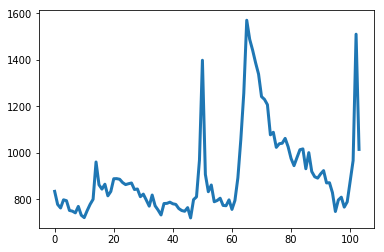

In [3]:
plt.plot(df_agg.loc[(df_agg['country']=='AU')&(df_agg['category']=='Mode 1')]\
         ['volume_weekly_total'].values[0].values, linewidth = 3)

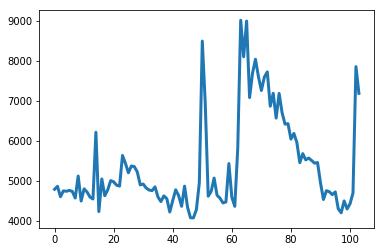

In [4]:
plt.plot(df_agg.loc[(df_agg['country']=='BR')&(df_agg['category']=='Mode 1')]\
         ['volume_weekly_total'].values[0].values, linewidth = 3)

In [5]:
weeks_2019 = list(df_agg.iloc[0]['volume_weekly_total'].index)[:52]
weeks_2020 = list(df_agg.iloc[0]['volume_weekly_total'].index)[52:]

In [6]:
l = []
for cnt, row in df_agg.iterrows():
    #if row['country'] in (["KE","EG"]):
    #    continue
    start_md = df_events.loc[df_events['country'] == row['country']].iloc[0]['start_md_1']
    end_md = df_events.loc[df_events['country'] == row['country']].iloc[0]['end_md_1']
    start_md2 = df_events.loc[df_events['country'] == row['country']].iloc[0]['start_md_2']
    
    for week in zip(row['volume_weekly_total'].index,row['volume_weekly_total'].values,row['volume_percent_weekly_total'].values):
        
        entry = {}

        entry['country'] = row['country']
        entry['category'] = row['category']
        

        if week[0] in weeks_2020:
            date = pd.to_datetime(week[0])

            if type(start_md2)!=pd._libs.tslibs.nattype.NaTType and date > start_md2:
                continue

            entry['k'] = math.floor(((date - start_md).days +7) / 7)
            entry['volume_total'] = week[1]
            entry['volume_percent'] = week[2]
            entry['year'] = '2020'
            l.append(entry)

        elif week[0] in weeks_2019:
            date = pd.to_datetime(weeks_2020[weeks_2019.index(week[0])])
            
            if type(start_md2)!=pd._libs.tslibs.nattype.NaTType and date > start_md2:
                continue

            entry['k'] = math.floor(((date - start_md).days +7) / 7)
            entry['volume_total'] = week[1]
            entry['volume_percent'] = week[2]
            entry['year'] = '2019'
            l.append(entry)

In [7]:
df = pd.DataFrame(l)
k = 30
df = df.loc[(df['k'] >= -30) & (df['k'] <= 30)].copy()
df['intervention_flag'] = df['k'].apply(lambda x: 1 if x >= 0 else 0)

In [8]:
#helpers

def generate_equation(order):
    if order == 'Cubic':
        eq = "volume_total ~ intervention_flag*k*year + intervention_flag*np.power(k,2)*year + intervention_flag*np.power(k,3)*year"
    elif order == "Quadratic":
        eq = "volume_total ~ intervention_flag*k*year + intervention_flag*np.power(k,2)*year"
    elif order == "Linear":
        eq = "volume_total ~ intervention_flag*k*year"
    elif order == 'Constant':
        eq = "volume_total ~ intervention_flag*year"
    return eq

def generate_equation_interactions(order):
    if order == 'Cubic':
        eq = "volume_total ~ intervention_flag*k*year*C(country)*C(category) + intervention_flag*np.power(k,2)*year*C(country)*C(category) + intervention_flag*np.power(k,3)*year*C(country)*C(category)"
    elif order == "Quadratic":
        eq = "volume_total ~ intervention_flag*k*year*C(country)*C(category) + intervention_flag*np.power(k,2)*year*C(country)*C(category)"
    elif order == "Linear":
        eq = "volume_total ~ intervention_flag*k*year*C(country)*C(category)"
    elif order == 'Constant':
        eq = "volume_total ~ intervention_flag*year*C(country)*C(category)"
    return eq
    
def get_standard_error_sum(covariates):
    '''
    #95CI is approximated with +- 2 sum_variance_standard_error
    '''
    
    #get the variance covariance matrix
    vcov = result_interactions.cov_params()\
        .loc[covariates,covariates].values
    
    #calculate the sum of all pair wise covariances by summing up
    m_sum = np.sum(vcov)
    
    #variance of a sum of variables is the square root
    return np.sqrt((m_sum))

In [9]:
df_temp = df.loc[(df['k'] >= -k) & (df['k'] <= k)].copy()
df_temp['volume_total'] = df_temp['volume_total'].apply(lambda x: np.log(x + 0.001))
mod = smf.ols(generate_equation_interactions('Quadratic'), data = df_temp)
result_interactions = mod.fit(cov_type='hc0')

In [10]:
cats = ['Mode 1','Mode 2','Mode 3','Mode 4']

In [11]:
default_country = 'AU'
default_category = 'Mode 1'

alpha_baseline = 'intervention_flag:year[T.2020]'
beta_baseline = 'intervention_flag:k:year[T.2020]'
gamma_baseline = 'intervention_flag:np.power(k, 2):year[T.2020]'

list_results = []

for country in full_names.keys():
    for c in cats:
        
        entry = {}
        entry['country']  = country
        entry['category'] = c
        
        suffix_country = (':C(country)[T.'+country+']')
        suffix_category = (':C(category)[T.'+c+']')
        
        if country == default_country and c == default_category:
            
            total_alpha = (result_interactions.params[alpha_baseline])
            total_alpha_error = (result_interactions.bse[alpha_baseline])
            
            total_beta = (result_interactions.params[beta_baseline])
            total_beta_error = (result_interactions.bse[beta_baseline])
            
            total_gamma = (result_interactions.params[gamma_baseline])
            total_gamma_error = (result_interactions.bse[gamma_baseline])
            
        elif country == default_country and c != default_category:
            
            total_alpha = (result_interactions.params[alpha_baseline]) \
                    + (result_interactions.params[alpha_baseline + suffix_category]) 
            total_alpha_error = (get_standard_error_sum([alpha_baseline, 
                                                         alpha_baseline + suffix_category]))
            
            total_beta = (result_interactions.params[beta_baseline]) \
                    + (result_interactions.params[beta_baseline + suffix_category]) 
            total_beta_error = (get_standard_error_sum([beta_baseline, 
                                                         beta_baseline + suffix_category]))
            
            total_gamma = (result_interactions.params[gamma_baseline]) \
                    + (result_interactions.params[gamma_baseline + suffix_category]) 
            total_gamma_error = (get_standard_error_sum([gamma_baseline, 
                                                         gamma_baseline + suffix_category]))

        elif country != default_country and c == default_category:
            
            total_alpha = (result_interactions.params[alpha_baseline]) \
                    + (result_interactions.params[alpha_baseline + suffix_country]) 
            total_alpha_error = (get_standard_error_sum([alpha_baseline,
                                                         alpha_baseline + suffix_country]))
            
            total_beta = (result_interactions.params[beta_baseline]) \
                    + (result_interactions.params[beta_baseline + suffix_country]) 
            total_beta_error = (get_standard_error_sum([beta_baseline,
                                                         beta_baseline + suffix_country]))
            
            total_gamma = (result_interactions.params[gamma_baseline]) \
                    + (result_interactions.params[gamma_baseline + suffix_country]) 
            total_gamma_error = (get_standard_error_sum([gamma_baseline,
                                                         gamma_baseline + suffix_country]))

        else:
            total_alpha = (result_interactions.params[alpha_baseline]) \
                    + (result_interactions.params[alpha_baseline + suffix_country]) \
                    + (result_interactions.params[alpha_baseline + suffix_category]) \
                    + (result_interactions.params[alpha_baseline + suffix_country + suffix_category])
            
            total_alpha_error = (get_standard_error_sum([alpha_baseline, 
                                                         alpha_baseline + suffix_category,
                                                         alpha_baseline + suffix_country, 
                                                         alpha_baseline + suffix_country + suffix_category]))
            
            total_beta = (result_interactions.params[beta_baseline]) \
                    + (result_interactions.params[beta_baseline + suffix_country]) \
                    + (result_interactions.params[beta_baseline + suffix_category]) \
                    + (result_interactions.params[beta_baseline + suffix_country + suffix_category])
            
            total_beta_error = (get_standard_error_sum([beta_baseline, 
                                                         beta_baseline + suffix_category,
                                                         beta_baseline + suffix_country, 
                                                         beta_baseline + suffix_country + suffix_category]))
            
            total_gamma = (result_interactions.params[gamma_baseline]) \
                    + (result_interactions.params[gamma_baseline + suffix_country]) \
                    + (result_interactions.params[gamma_baseline + suffix_category]) \
                    + (result_interactions.params[gamma_baseline + suffix_country + suffix_category])
            
            total_gamma_error = (get_standard_error_sum([gamma_baseline, 
                                                         gamma_baseline + suffix_category,
                                                         gamma_baseline + suffix_country, 
                                                         gamma_baseline + suffix_country + suffix_category]))
            
        entry['alpha'] = total_alpha
        entry['alpha_ste'] = total_alpha_error
        entry['beta'] = total_beta
        entry['beta_ste'] = total_beta_error
        entry['gamma'] = total_gamma
        entry['gamma_ste'] = total_gamma_error
        
        list_results.append(entry)
        
df_results = pd.DataFrame(list_results)

In [12]:
countries_sorted = list(df_results.loc[df_results['category'] == 'Mode 1'].\
                        sort_values(by = 'alpha', ascending = False)['country'].values)

In [13]:
cats_sorted = list(df_results.groupby('category')['alpha'].agg('mean').sort_values(ascending = False).index)

In [14]:
sorterIndex = dict(zip(countries_sorted, range(len(countries_sorted))))

def sort_pd(key=None,reverse=False):
    def sorter(series):
        series_list = list(series)
        return [series_list.index(i) 
           for i in sorted(series_list,key=key,reverse=reverse)]
    return sorter

sort_by_custom_dict = sort_pd(key=sorterIndex.get)

In [15]:
dict_annotate = {'Mode 1': 'Recipe, cooking, baking, grocery\n store, supermarket',
                 'Mode 2': 'Food delivery, take-out,\n drive-in', 
                 'Mode 3': 'Restaurant, careteria, cafe,\n diner, food festival', 
                 'Mode 4': 'Picnic, barbecue, \nlunchbox'}

Recipe, cooking, baking, grocery
 store, supermarket
20    IN
32    ES
36    GB
24    IT
48    KE
12    FR
64    ID
40    US
28    MX
8     CA
4     BR
16    DE
52    NG
0     AU
44    DK
68    EG
60    SE
56    JP
Name: country, dtype: object
20    1.797701
32    1.317092
36    1.185402
24    1.149746
48    1.072336
12    1.070193
64    0.902031
40    0.827624
28    0.794885
8     0.768953
4     0.590108
16    0.538027
52    0.488877
0     0.403557
44    0.341805
68    0.321766
60    0.093179
56   -0.074647
Name: alpha, dtype: float64
Food delivery, take-out,
 drive-in
21    IN
33    ES
37    GB
25    IT
49    KE
13    FR
65    ID
41    US
29    MX
9     CA
5     BR
17    DE
53    NG
1     AU
45    DK
69    EG
61    SE
57    JP
Name: country, dtype: object
21    0.441311
33   -0.082260
37    0.452246
25    1.580676
49   -0.290143
13    1.624421
65    3.067592
41    2.025511
29    0.497436
9     1.635793
5     1.015098
17    0.156806
53    0.018578
1     1.172182
45    1.869871
69   -0

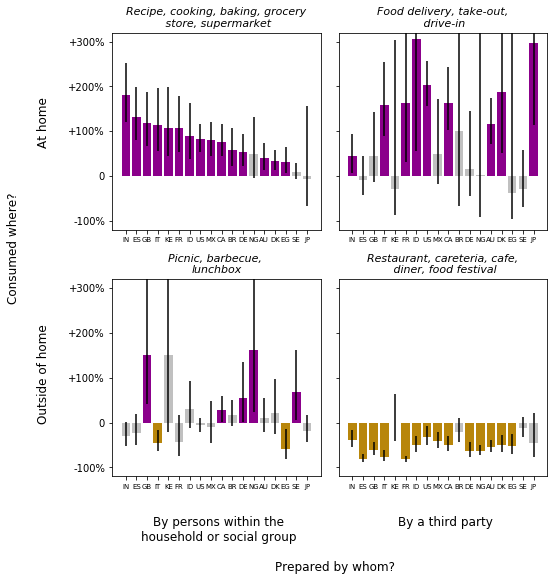

In [16]:
fig, axes = plt.subplots(2,2, figsize = (7,7), sharey = True)

for cnt,c in enumerate(['Mode 1','Mode 2','Mode 4','Mode 3']):
    sbplt = axes[math.floor(cnt/2), cnt%2]
    x = df_results.loc[df_results['category'] == c].iloc[sort_by_custom_dict(df_results.loc[df_results['category'] == c]['country'])][['alpha','country','alpha_ste']]
    
    colors_bars = []
    for i in range(18):
        if x['alpha'].values[i]>0 and x['alpha'].values[i]-2*x['alpha_ste'].values[i]>0:
            colors_bars.append('darkmagenta')
        elif x['alpha'].values[i]<0 and x['alpha'].values[i]+2*x['alpha_ste'].values[i]<0:
            colors_bars.append('darkgoldenrod')
        else:
            colors_bars.append('silver')
            
    #sbplt.bar(range(12),x['alpha'].apply(lambda x: np.exp(x)-1), yerr = 2*x['alpha_ste'].apply(lambda x: np.exp(x)-1), color = colors_bars)
    print(dict_annotate[c])
    print(x['country'])
    print(x['alpha'].apply(lambda x: np.exp(x)-1))
    
    
    sbplt.bar(range(18),x['alpha'].apply(lambda x: np.exp(x)-1),
            #here we convert errors back to linear scale
            yerr = np.array([x['alpha'].apply(lambda x: np.exp(x)-1) - (x['alpha']-2*x['alpha_ste']).apply(lambda x: np.exp(x)-1),
                            (x['alpha']+2*x['alpha_ste']).apply(lambda x: np.exp(x)-1) - x['alpha'].apply(lambda x: np.exp(x)-1)]), 
            color = colors_bars)
    
    #print(x['alpha'].apply(lambda x: np.exp(x)-1)*100)
    #print(x['country'])
    sbplt.set_xticks(range(18))
    sbplt.set_xticklabels(x['country'], fontsize= 7)
    sbplt.set_title(dict_annotate[c], size= 11, style='italic')
    
    sbplt.set_yticks([-2,-1,0,1,2,3,4])
    sbplt.set_yticklabels(["-200%","-100%","0","+100%","+200%","+300%","+400%"])
    sbplt.set_ylim([-1.2,3.2])

#fig.suptitle("α", position = (0.5, 1.05))

size_l = 12
fig.text(0.55, -0.14, 'Prepared by whom?', ha='center', fontsize= size_l)
fig.text(0.32, -0.08, 'By persons within the\nhousehold or social group', ha='center', fontsize= size_l)
fig.text(0.77, -0.08, 'By a third party\n', ha='center', fontsize= size_l)

fig.text(-0.1, 0.5, 'Consumed where?', va='center', rotation='vertical', fontsize= size_l)
fig.text(-0.04, 0.25, 'Outside of home', va='center', rotation='vertical', fontsize= size_l)
fig.text(-0.04, 0.75, 'At home', va='center', rotation='vertical', fontsize= size_l)
plt.tight_layout()


plt.savefig(FIGURES_DIR+"modes_effect.pdf", bbox_inches='tight')

In [17]:
dict_max_mobility = {'AU': ("2020-04-15", 21.714285714285715),
    'BR': ("2020-03-27",  20.857142857142858),
    'CA': ("2020-04-15",  23.285714285714285),
    'FR': ("2020-03-29",  30.428571428571427),
    'DE': ("2020-04-15",  17.428571428571427),
    'IN': ("2020-04-13",  29.142857142857142),
    'IT': ("2020-03-30",  31.571428571428573),
    'MX': ("2020-04-14",  21.142857142857142),
    'ES': ("2020-04-12",  31.428571428571427),
    'GB': ("2020-04-15",  25.714285714285715),
    'US': ("2020-04-09",  19.428571428571427),
    'DK': ("2020-03-23",  16.857142857142858),
    'EG': ("2020-05-28",  19.0),
    'ID': ("2020-05-06",  19.714285714285715),
    'JP': ("2020-05-05",  21.428571428571427),
    'KE': ("2020-04-12",  24.571428571428573),
    'NG': ("2020-04-25",  28.0),
    'SE': ("2020-04-04",  10.142857142857142)}

In [18]:
df_mobility_max = pd.DataFrame(dict_max_mobility)
df_mobility_max = df_mobility_max.transpose()

In [19]:
for cnt,c in enumerate(['Mode 1','Mode 2','Mode 4','Mode 3']):
    sbplt = axes[math.floor(cnt/2), cnt%2]
    x = df_results.loc[df_results['category'] == c][['alpha','country','alpha_ste']]
    x = x.set_index('country')
    df_mobility_max = df_mobility_max.join(x).rename(columns={"alpha": c+"_alpha", "alpha_ste": c+"_alpha_ste"})

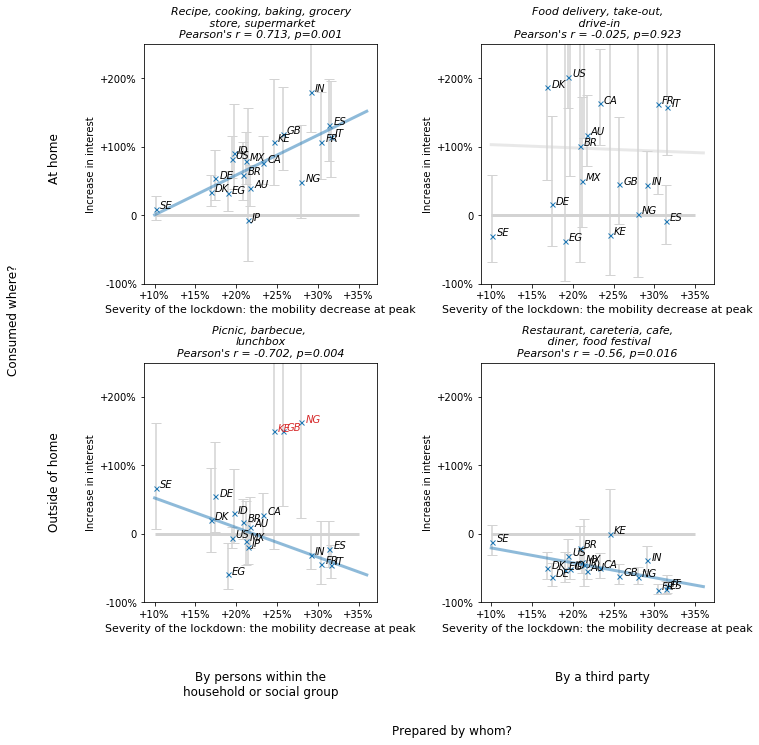

In [20]:
fig, axes = plt.subplots(2,2, figsize = (9.5,9), sharey = False, sharex = False)

for cnt,c in enumerate(['Mode 1','Mode 2','Mode 4','Mode 3']):
    sbplt = axes[math.floor(cnt/2), cnt%2]
    
    sbplt.set_xlabel('Severity of the lockdown: the mobility decrease at peak', fontsize = 11)
    
    
    sbplt.errorbar(df_mobility_max[1],df_mobility_max[c+'_alpha'].apply(lambda x: np.exp(x)-1),
           yerr = np.array([df_mobility_max[c+'_alpha'].apply(lambda x: np.exp(x)-1) - (df_mobility_max[c+'_alpha']-2*df_mobility_max[c+'_alpha_ste']).apply(lambda x: np.exp(x)-1),
                            (df_mobility_max[c+'_alpha']+2*df_mobility_max[c+'_alpha_ste']).apply(lambda x: np.exp(x)-1) - df_mobility_max[c+'_alpha'].apply(lambda x: np.exp(x)-1)]),
             linestyle ='none', capsize= 5, marker = 'x', markersize= 5, ecolor = 'lightgray')
    
    sbplt.hlines(0,10,35,color= 'lightgray',linewidth = 3)
   
    sbplt.set_yticks([-2,-1,0,1,2])
    sbplt.set_yticklabels(["-200%","-100%","0","+100%","+200%"])
    
    sbplt.set_xticks([10,15,20,25,30,35])
    sbplt.set_xticklabels(["+10%","+15%","+20%","+25%","+30%","+35%"])
    
    sbplt.set_ylabel('Increase in interest')
    for i in range(18):

        if c == "Mode 4" and (df_mobility_max.index[i]=='GB' or df_mobility_max.index[i]=='NG' or df_mobility_max.index[i]=='KE'):
            sbplt.annotate(df_mobility_max.index[i],
                 #dict_max_mobility[df_mobility_max.index[i]][0],
                 (df_mobility_max[1][i]+.5,df_mobility_max[c+'_alpha'].apply(lambda x: np.exp(x)-1)[i]), 
                 style = 'italic', color = 'tab:red',fontsize = 10)
        else:
            sbplt.annotate(df_mobility_max.index[i],
                 #dict_max_mobility[df_mobility_max.index[i]][0],
                 (df_mobility_max[1][i]+.5,df_mobility_max[c+'_alpha'].apply(lambda x: np.exp(x)-1)[i]), 
                 style = 'italic', fontsize = 10)
    sbplt.set_ylim([-1,2.5])
    
    m, b = np.polyfit(list(df_mobility_max[1].values), list(df_mobility_max[c+'_alpha'].apply(lambda x: np.exp(x)-1).values), 1)
    
    if c=="Mode 4":
        m, b = np.polyfit(list(df_mobility_max.drop(['GB','KE','NG'])[1].values), list(df_mobility_max.drop(['GB','KE','NG'])[c+'_alpha'].apply(lambda x: np.exp(x)-1).values), 1)
        
        if pearsonr(df_mobility_max.drop(['GB','KE','NG'])[1],df_mobility_max.drop(['GB','KE','NG'])[c+'_alpha'].apply(lambda x: np.exp(x)-1))[1] < 0.05:
            sbplt.plot((np.array(list(range(10,37,2)))), m*(np.array(list(range(10,37,2)))) + b, alpha = 0.5, linewidth = 3)
        else:
            sbplt.plot((np.array(list(range(10,37,2)))), m*(np.array(list(range(10,37,2)))) + b, alpha = 0.5, color = 'lightgray', linewidth = 3)
        
        sbplt.set_title(dict_annotate[c]+\
                    '\n'+'Pearson\'s r = '+str(round(pearsonr(df_mobility_max.drop(['GB','KE','NG'])[1],df_mobility_max.drop(['GB','KE','NG'])[c+'_alpha'].apply(lambda x: np.exp(x)-1))[0],3))+\
         ', p='+str(round(pearsonr(df_mobility_max.drop(['GB','KE','NG'])[1],df_mobility_max.drop(['GB','KE','NG'])[c+'_alpha'].apply(lambda x: np.exp(x)-1))[1],3)), size= 11, style='italic')
    
    else:
        sbplt.set_title(dict_annotate[c]+\
                    '\n'+'Pearson\'s r = '+str(round(pearsonr(df_mobility_max[1],df_mobility_max[c+'_alpha'].apply(lambda x: np.exp(x)-1))[0],3))+\
         ', p='+str(round(pearsonr(df_mobility_max[1],df_mobility_max[c+'_alpha'].apply(lambda x: np.exp(x)-1))[1],3)), size= 11, style='italic')
    
        if pearsonr(df_mobility_max[1],df_mobility_max[c+'_alpha'].apply(lambda x: np.exp(x)-1))[1] < 0.05:
            sbplt.plot((np.array(list(range(10,37,2)))), m*(np.array(list(range(10,37,2)))) + b, alpha = 0.5, linewidth = 3)
        else:
            sbplt.plot((np.array(list(range(10,37,2)))), m*(np.array(list(range(10,37,2)))) + b, alpha = 0.5, color = 'lightgray', linewidth = 3)

size_l = 12
fig.text(0.55, -0.14, 'Prepared by whom?', ha='center', fontsize= size_l)
fig.text(0.27, -0.08, 'By persons within the\nhousehold or social group', ha='center', fontsize= size_l)
fig.text(0.77, -0.08, 'By a third party\n', ha='center', fontsize= size_l)

fig.text(-0.1, 0.5, 'Consumed where?', va='center', rotation='vertical', fontsize= size_l)
fig.text(-0.04, 0.25, 'Outside of home', va='center', rotation='vertical', fontsize= size_l)
fig.text(-0.04, 0.75, 'At home', va='center', rotation='vertical', fontsize= size_l)
plt.tight_layout()

plt.savefig(FIGURES_DIR+"modes_severity.pdf", bbox_inches='tight')

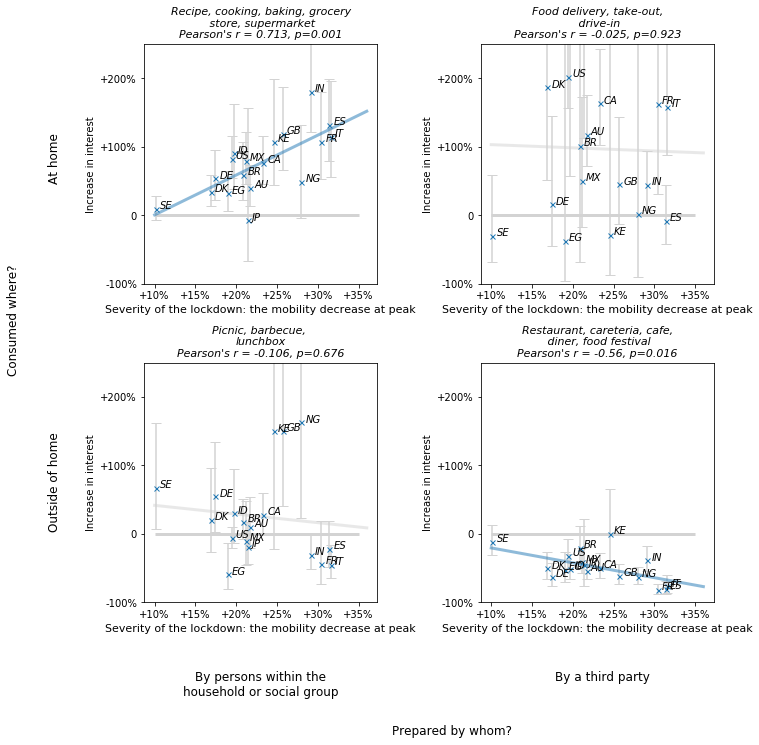

In [21]:
fig, axes = plt.subplots(2,2, figsize = (9.5,9), sharey = False, sharex = False)

for cnt,c in enumerate(['Mode 1','Mode 2','Mode 4','Mode 3']):
    sbplt = axes[math.floor(cnt/2), cnt%2]
    
    sbplt.set_xlabel('Severity of the lockdown: the mobility decrease at peak', fontsize = 11)
    
    
    sbplt.errorbar(df_mobility_max[1],df_mobility_max[c+'_alpha'].apply(lambda x: np.exp(x)-1),
           yerr = np.array([df_mobility_max[c+'_alpha'].apply(lambda x: np.exp(x)-1) - (df_mobility_max[c+'_alpha']-2*df_mobility_max[c+'_alpha_ste']).apply(lambda x: np.exp(x)-1),
                            (df_mobility_max[c+'_alpha']+2*df_mobility_max[c+'_alpha_ste']).apply(lambda x: np.exp(x)-1) - df_mobility_max[c+'_alpha'].apply(lambda x: np.exp(x)-1)]),
             linestyle ='none', capsize= 5, marker = 'x', markersize= 5, ecolor = 'lightgray')
    
    sbplt.hlines(0,10,35,color= 'lightgray',linewidth = 3)
   
    sbplt.set_yticks([-2,-1,0,1,2])
    sbplt.set_yticklabels(["-200%","-100%","0","+100%","+200%"])
    
    sbplt.set_xticks([10,15,20,25,30,35])
    sbplt.set_xticklabels(["+10%","+15%","+20%","+25%","+30%","+35%"])
    
    sbplt.set_ylabel('Increase in interest')
    for i in range(18):


        sbplt.annotate(df_mobility_max.index[i],
             #dict_max_mobility[df_mobility_max.index[i]][0],
             (df_mobility_max[1][i]+.5,df_mobility_max[c+'_alpha'].apply(lambda x: np.exp(x)-1)[i]), 
             style = 'italic', fontsize = 10)
    sbplt.set_ylim([-1,2.5])
    
    m, b = np.polyfit(list(df_mobility_max[1].values), list(df_mobility_max[c+'_alpha'].apply(lambda x: np.exp(x)-1).values), 1)
    

    sbplt.set_title(dict_annotate[c]+\
                '\n'+'Pearson\'s r = '+str(round(pearsonr(df_mobility_max[1],df_mobility_max[c+'_alpha'].apply(lambda x: np.exp(x)-1))[0],3))+\
     ', p='+str(round(pearsonr(df_mobility_max[1],df_mobility_max[c+'_alpha'].apply(lambda x: np.exp(x)-1))[1],3)), size= 11, style='italic')

    if pearsonr(df_mobility_max[1],df_mobility_max[c+'_alpha'].apply(lambda x: np.exp(x)-1))[1] < 0.05:
        sbplt.plot((np.array(list(range(10,37,2)))), m*(np.array(list(range(10,37,2)))) + b, alpha = 0.5, linewidth = 3)
    else:
        sbplt.plot((np.array(list(range(10,37,2)))), m*(np.array(list(range(10,37,2)))) + b, alpha = 0.5, color = 'lightgray', linewidth = 3)

size_l = 12
fig.text(0.55, -0.14, 'Prepared by whom?', ha='center', fontsize= size_l)
fig.text(0.27, -0.08, 'By persons within the\nhousehold or social group', ha='center', fontsize= size_l)
fig.text(0.77, -0.08, 'By a third party\n', ha='center', fontsize= size_l)

fig.text(-0.1, 0.5, 'Consumed where?', va='center', rotation='vertical', fontsize= size_l)
fig.text(-0.04, 0.25, 'Outside of home', va='center', rotation='vertical', fontsize= size_l)
fig.text(-0.04, 0.75, 'At home', va='center', rotation='vertical', fontsize= size_l)
plt.tight_layout()

plt.savefig(FIGURES_DIR+"modes_severity.pdf", bbox_inches='tight')

In [22]:
lst_heatmap = []
lst_heatmap_size_long_term = []

for c in cats:
    for country in sorted(list(full_names.keys())):
        #if c == 'bread and flatbread':
            entry = {}
            entry['country'] = country
            entry['category'] = c
            
            entry2 = {}
            entry2['country'] = country
            entry2['category'] = c
            #print(country, c)
            
            x = df_results.loc[(df_results['country'] == country) & (df_results['category'] == c)].iloc[0].copy()
            
            if (x['alpha']>0 and x['alpha']-2*x['alpha_ste']>0) or (x['alpha']<0 and x['alpha']+2*x['alpha_ste']<0):
                #print('significant short term increase or decrease')
                tmp = df_temp.loc[(df_temp['country'] == country)&(df_temp['category'] == c)].copy()

                #2019
                tmp1 = tmp.loc[tmp['year'] == '2019'].copy()

                tmp2 = tmp.loc[tmp['year'] == '2020'].copy()

                upper_error_2019 = result_interactions.get_prediction(tmp1.loc[tmp1['k']>=0]).conf_int()[:,1]
                lower_error_2020 = result_interactions.get_prediction(tmp2.loc[tmp2['k']>=0]).conf_int()[:,0]
                
                lower_error_2019 = result_interactions.get_prediction(tmp1.loc[tmp1['k']>=0]).conf_int()[:,0]
                upper_error_2020 = result_interactions.get_prediction(tmp2.loc[tmp2['k']>=0]).conf_int()[:,1]
                
                if ((x['alpha']>0 and x['alpha']-2*x['alpha_ste']>0) and sum(lower_error_2020 < upper_error_2019) == 0) or \
                ((x['alpha']<0 and x['alpha']-2*x['alpha_ste']<0) and sum(upper_error_2020 > lower_error_2019) == 0):
                    print(c,country,'does not fall back')
                    #print('doesn\'t fall back to normal')
                    mean2 = (np.mean(result_interactions.get_prediction(tmp2.loc[tmp2['k']>=0]).predicted_mean[-1:]))
                    mean1 = (np.mean(result_interactions.get_prediction(tmp1.loc[tmp1['k']>=0]).predicted_mean[-1:]))
                    
                    entry2['value'] = (np.exp(mean2) - np.exp(mean1)) / np.exp(mean1)

                    entry['value'] = 1000
                else:
                    if (x['alpha']>0 and x['alpha']-2*x['alpha_ste']>0):
                        v = (lower_error_2020 < upper_error_2019).argmax()
                        print(c,country,'falls back in',v)
                        #print('falls back to normal in ',v)
                        if v == 1:
                            entry['value'] = 1
                            entry2['value'] = 0
                        else:
                            entry['value'] = v
                            entry2['value'] = 0
                    elif (x['alpha']<0 and x['alpha']+2*x['alpha_ste']<0):
                        v = (upper_error_2020 > lower_error_2019).argmax()
                        print(c,country,'falls back in',v)
                        #print('falls back to normal in ',v)
                        if v == 1:
                            entry['value'] = 1
                            entry2['value'] = 0
                        else:
                            entry['value'] = v
                            entry2['value'] = 0
            else:
                entry['value'] = 0
                entry2['value'] = 0
                print(c,country,'nosign changes')
                #('no significant short term changes')
            
            lst_heatmap.append(entry)
            lst_heatmap_size_long_term.append(entry2)

            
            continue
            plt.figure()
            plt.fill_between(tmp1['k'],result_interactions.get_prediction(tmp1).conf_int()[:,0],
                     result_interactions.get_prediction(tmp1).conf_int()[:,1], alpha = 0.3, color = 'gray')
            plt.plot(tmp1.loc[tmp1['k']<0]['k'],result_interactions.get_prediction(tmp1.loc[tmp1['k']<0]).predicted_mean, color = 'tab:orange', label = '2020')
            plt.plot(tmp1.loc[tmp1['k']>=0]['k'],result_interactions.get_prediction(tmp1.loc[tmp1['k']>=0]).predicted_mean, color = 'tab:orange', label = '2020')

            plt.scatter(tmp1['k'],tmp1['volume_total'], color = 'tab:orange')
           

            plt.fill_between(tmp2['k'],result_interactions.get_prediction(tmp2).conf_int()[:,0],
                     result_interactions.get_prediction(tmp2).conf_int()[:,1], alpha = 0.3, color = 'gray')

            plt.plot(tmp2.loc[tmp2['k']<0]['k'],result_interactions.get_prediction(tmp2.loc[tmp2['k']<0]).predicted_mean, color = 'tab:blue', label = '2019')
            plt.plot(tmp2.loc[tmp2['k']>=0]['k'],result_interactions.get_prediction(tmp2.loc[tmp2['k']>=0]).predicted_mean, color = 'tab:blue', label = '2019')

            plt.scatter(tmp2['k'],tmp2['volume_total'], color = 'tab:blue')


            plt.xlabel('k')
            plt.ylabel('log total volume')
            

            

Mode 1 AU does not fall back
Mode 1 BR falls back in 29
Mode 1 CA falls back in 27
Mode 1 DE falls back in 29
Mode 1 DK falls back in 17
Mode 1 EG falls back in 6
Mode 1 ES does not fall back
Mode 1 FR falls back in 27
Mode 1 GB does not fall back
Mode 1 ID falls back in 20
Mode 1 IN falls back in 26
Mode 1 IT falls back in 19
Mode 1 JP nosign changes
Mode 1 KE falls back in 29
Mode 1 MX falls back in 29
Mode 1 NG nosign changes
Mode 1 SE nosign changes
Mode 1 US does not fall back
Mode 2 AU does not fall back
Mode 2 BR nosign changes
Mode 2 CA does not fall back
Mode 2 DE nosign changes
Mode 2 DK does not fall back
Mode 2 EG nosign changes
Mode 2 ES nosign changes
Mode 2 FR falls back in 14
Mode 2 GB nosign changes
Mode 2 ID falls back in 0
Mode 2 IN falls back in 0
Mode 2 IT does not fall back
Mode 2 JP does not fall back
Mode 2 KE nosign changes
Mode 2 MX nosign changes
Mode 2 NG nosign changes
Mode 2 SE nosign changes
Mode 2 US does not fall back
Mode 3 AU falls back in 18
Mode 3 B

In [23]:
df_heatmap = pd.DataFrame(lst_heatmap)
matrix = np.zeros((4,18))

df_heatmap_longterm = pd.DataFrame(lst_heatmap_size_long_term)
matrix_longterm = np.zeros((4,18))

In [24]:
countries_sorted = ['ES',
 'GB',
 'FR',
 'KE',
 'IT',
 'IN',
 'ID',
 'BR',
 'CA',
 'US',
 'NG',
 'MX',
 'AU',
 'DE',
 'EG',
 'DK',
 'SE',
 'JP']

In [25]:
for cnt1,country in enumerate(countries_sorted):   
    for cnt2,cat in enumerate(cats_sorted):
        x = df_heatmap.loc[(df_heatmap['country'] == country) & (df_heatmap['category'] == cat)].iloc[0].copy()
        matrix[cnt2,cnt1] = (x['value'])   

In [26]:
for cnt1,country in enumerate(countries_sorted):   
    for cnt2,cat in enumerate(cats_sorted):
        x = df_heatmap_longterm.loc[(df_heatmap_longterm['country'] == country) & (df_heatmap_longterm['category'] == cat)].iloc[0].copy()
        matrix_longterm[cnt2,cnt1] = (x['value'])    

In [27]:
mask = (matrix <2) + (matrix > 999)

In [28]:
annotations = np.empty((18,4), dtype='object')

for i in range(18):
    for j in range(4):
        if (matrix > 140)[j][i]:    
            annotations[i][j] = "+"
        else:
            annotations[i][j] = ""

In [29]:
annotations = np.empty((18,4), dtype='object')

for i in range(18):
    for j in range(4):
        if (matrix > 140)[j][i]:    
            if matrix_longterm[j][i]>0:
                annotations[i][j] = "+"+str(matrix_longterm[j][i]*100)[:4]+"%"
            else:
                annotations[i][j] = str(matrix_longterm[j][i]*100)[:4]+"%"
        else:
            annotations[i][j] = ""

In [30]:
dict_annotate = {'Mode 1': 'recipe, cooking, baking, grocery store, supermarket',
                 'Mode 2': 'food delivery, take-out, drive-in', 
                 'Mode 3': 'restaurant, careteria, cafe, diner, food festival', 
                 'Mode 4': 'picnic, barbecue, lunchbox'}

In [31]:
import matplotlib
matplotlib.rcParams.update({'font.size': 12})


In [32]:
mask

array([[ True,  True, False, False, False, False, False, False, False,
         True,  True, False,  True, False, False, False,  True,  True],
       [ True,  True, False,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True, False,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True, False,  True],
       [False, False, False,  True, False,  True,  True,  True, False,
        False, False,  True, False, False, False, False,  True,  True]])

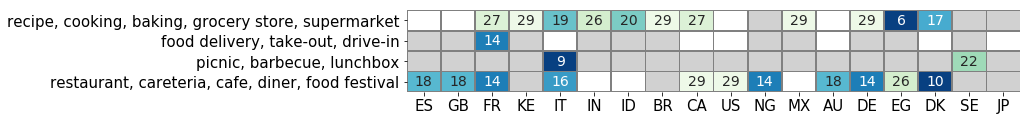

In [33]:
fig, ax = plt.subplots(1,1,figsize= (11,1.5))
matplotlib.rcParams.update({'font.size': 14})

sns.heatmap(matrix_longterm!=0, cbar=False,  cmap = "Greys_r", vmin = -2.5, vmax = 1,linewidths = 0.5,linecolor = 'gray',
            annot = False,  fmt="");


sns.heatmap(matrix, mask = mask, vmin = 10, vmax = 30, annot=True, fmt=".0f", 
            cmap="GnBu_r", cbar = False, linewidths = 0.75,linecolor = 'gray')

ax.set_yticks(np.array(range(4))+0.5)
ax.set_yticklabels([dict_annotate[i] for i in cats_sorted], rotation = 0,fontsize = 15);

ax.set_xticks(np.array(range(18))+0.5)
ax.set_xticklabels(countries_sorted, rotation = 0, fontsize = 15);


plt.savefig(FIGURES_DIR+"modes_time.pdf", bbox_inches='tight')

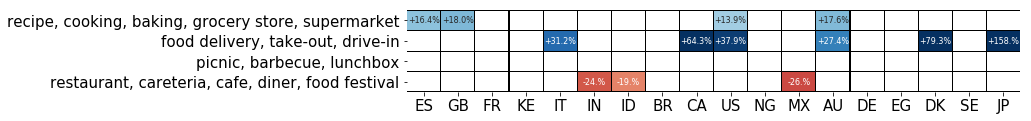

In [34]:
fig, ax = plt.subplots(1,1,figsize= (11,1.5))
matplotlib.rcParams.update({'font.size': 8})



sns.heatmap(matrix_longterm, vmin = -0.40, vmax = 0.4, cbar=False,  linewidths = 0,linecolor = 'white',
            cmap = "RdBu",
            annot = annotations.T,  fmt="")

sns.heatmap(matrix_longterm, mask = (matrix_longterm >0.01) | (matrix_longterm <-0.01),vmin = 0, cbar=False, linewidths = 0.01,linecolor = 'black',
            cmap = "Greys",
            annot = False,  fmt="")

ax.set_yticks(np.array(range(4))+0.5)
ax.set_yticklabels([dict_annotate[i] for i in cats_sorted], rotation = 0,fontsize = 15);

ax.set_xticks(np.array(range(18))+0.5)
ax.set_xticklabels(countries_sorted, rotation = 0, fontsize = 15);


plt.savefig(FIGURES_DIR+"modes_longterm_effect.pdf", bbox_inches='tight')